## NYC Demographics and SAT Scores - 2012

SATs have become a controversial topic in the US due to a claim that they are unfair to certain demographic groups.
In this project I will explore relationships between demographics and SAT scores in the NYC in 2012. Because demographics and geographics are often intertwined, as in the case of the NYC, I will also be looking at geographic data.

The data is provided by NYC Open Data. There are eight files I will use. I placed them into a folder titled 'data':

* SAT Scores (2012)
* AP Scores (2010)
* Class Size (2010-2011)
* Attendance (2010-2011)
* Graduation Outcomes (2005-2010)
* School Demographics and Accountability (2006-2012)
* School Survey (2011) excluding district 75 - see below
* School Survey (2011) district 75 - see below

*According to NYC Open Data, school survey is taken each year by students, teachers, and parents to assess the community's opinions on academic expectations, communication, engagement, safety, and respect.

*District 75 is for children with disabilities and cognitive delays.

My first step is to combine all the data files into one dataset.

Here are the common fields (columns) that I will use to combine all the data. Please note that DBN is a combination of 3 pieces of information that can be extracted into its own field (column): district, borough, and school number.
* SAT Scores (2012) <span style="color:red">DBN (Unique school identifier)</span>
* AP Scores (2010) <span style="color:red">DBN (Unique school identifier)</span>
* Class Size (2010-2011) Combination of <span style="color:green">CSD</span> and <span style="color:blue">SCHOOL CODE</span> is the same as the <span style="color:red">DBN (Unique school identifier)</span>
* Attendance (2010-2011) <span style="color:green">District</span>
* Graduation Outcomes (2005-2010) <span style="color:red">DBN (Unique school identifier)</span>
* School Demographics and Accountability (2006-2012) <span style="color:red">DBN (Unique school identifier)</span>
* School Survey (2011) excluding district 75 <span style="color:red">DBN (Unique school identifier)</span>
* School Survey (2011) district 75 <span style="color:red">DBN (Unique school identifier)</span>

### Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [77]:
%matplotlib inline

### Read Files

In [78]:
sat_df = pd.read_csv('sat_results.csv')
ap_df = pd.read_csv('ap_2010.csv')
class_size_df = pd.read_csv('class_size.csv')
attendance_df = pd.read_csv('attendance.csv')
graduation_df = pd.read_csv('graduation.csv')
demographics_df = pd.read_csv('demographics.csv')
hs_directory_df = pd.read_csv('hs_directory.csv')
all_survey = pd.read_csv('survey_all.txt', sep='\t', encoding='cp1252')
d75_survey = pd.read_csv('survey_d75.txt', sep = '\t', encoding='cp1252')

### Add Dataframes to Dictionary

In [79]:
data = {'ap_2010': ap_df,
        'class_size': class_size_df,
        'demographics': demographics_df,
        'graduation': graduation_df,
        'hs_directory': hs_directory_df,
        'sat_results': sat_df,
        'attendance': attendance_df}

### Explore SAT Scores

In [80]:
print(sat_df.head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [81]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [82]:
sat_df.describe()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,478,478,478,478,478,478
unique,478,478,175,164,173,163
top,02M303,FLUSHING HIGH SCHOOL,s,s,s,s
freq,1,1,57,57,57,57


#### Now I can convert columns to a numeric type

In [83]:
convert_cols = sat_df.columns[2:]

In [84]:
convert_cols #show columns I am converting from object to numeric

Index(['Num of SAT Test Takers', 'SAT Critical Reading Avg. Score',
       'SAT Math Avg. Score', 'SAT Writing Avg. Score'],
      dtype='object')

In [85]:
for col in convert_cols:
    sat_df[col] = pd.to_numeric(sat_df[col], errors='coerce')

#### Verify that columns converted to numeric

In [86]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             421 non-null float64
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
dtypes: float64(4), object(2)
memory usage: 22.5+ KB


#### Continue with the exploration

In [87]:
sat_df.describe()

,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,421.000000,421.000000,421.000000,421.000000
mean,110.320665,400.850356,413.368171,393.985748
std,155.534254,56.802783,64.684655,58.635109
min,6.000000,279.000000,312.000000,286.000000
25%,41.000000,368.000000,371.000000,360.000000
50%,62.000000,391.000000,395.000000,381.000000
75%,95.000000,416.000000,437.000000,411.000000
max,1277.000000,679.000000,735.000000,682.000000


#### Everything looks clean with no missing values, with one possible exception. I see that the median number of SAT takers is 62, but maximum is 1,277. I will sort this data and check out top 5 schools by the number of SAT takers

In [88]:
sat_df.sort_values('Num of SAT Test Takers', ascending=False).head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
249,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277.0,587.0,659.0,587.0
401,26Q430,FRANCIS LEWIS HIGH SCHOOL,934.0,468.0,539.0,467.0
400,26Q415,BENJAMIN N. CARDOZO HIGH SCHOOL,888.0,480.0,545.0,489.0
48,02M475,STUYVESANT HIGH SCHOOL,832.0,679.0,735.0,682.0
363,22K405,MIDWOOD HIGH SCHOOL,824.0,478.0,519.0,476.0


#### Based on this, I don't believe the data is bad in the Num of Test Takers column, a small percentage of schools just have a lot of test takers. 
#### Next I will loop through the dataframes and show the first 5 rows of data in each

In [89]:
for dataframe in data.keys():
    print(dataframe)
    print(data[dataframe].head())

ap_2010
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management             NaN   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                  NaN  
2                26                                   24  
3               377                                  191  
4               NaN                                  NaN  
class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K    

#### Combine two survey files into one

In [90]:
survey = pd.concat([all_survey, d75_survey])

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [91]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


#### Remove unnecessary data from survey

In [92]:
survey.rename(columns={'dbn': 'DBN'}, inplace=True)

In [93]:
keep_cols = ['DBN', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11',
       'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11',
       'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11',
       'aca_tot_11']

In [94]:
survey = survey[keep_cols]

#### Continue data transformation and cleanup

In [95]:
hs_directory_df.rename(columns={'dbn': 'DBN'}, inplace=True)
class_size_df['padded_csd'] = class_size_df['CSD'].astype(str).str.zfill(2)
class_size_df['DBN'] = class_size_df['padded_csd'] + class_size_df['SCHOOL CODE']

#### Add SAT Scores

In [96]:
sat_df['sat_score'] = sat_df['SAT Critical Reading Avg. Score'] + sat_df['SAT Math Avg. Score'] + sat_df['SAT Writing Avg. Score']

In [97]:
sat_df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0,1207.0


#### Extract coordinates from data

In [98]:
def extract_latitude(string):
    result = re.findall('\(.+\)', string)[0]
    result = result.split(',')[0]
    result = result.replace('(', '')
    return float(result)

In [99]:
hs_directory_df['lat'] = hs_directory_df['Location 1'].apply(extract_latitude)

In [100]:
hs_directory_df.head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,"100,802","4,300,730","4,157,360,001",Far Rockaway-Bayswater ...,40.601989
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306,"3,186,454","3,068,830,001",Gravesend ...,40.593594
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291,"3,393,805","3,016,160,001",Stuyvesant Heights ...,40.692134
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16,"2,022,205","2,036,040,039",Soundview-Castle Hill-Clason Point-Harding Par...,40.822304
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151,"1,030,341","1,011,560,030",Lincoln Square ...,40.773671


In [101]:
def extract_longitude(string):
    result = re.findall('\(.+\)', string)[0]
    result = result.split(',')[1]
    result = result.replace(')', '')
    return float(result)

In [102]:
hs_directory_df['lon'] = hs_directory_df['Location 1'].apply(extract_longitude)

In [103]:
hs_directory_df.head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,"100,802","4,300,730","4,157,360,001",Far Rockaway-Bayswater ...,40.601989,-73.762834
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306,"3,186,454","3,068,830,001",Gravesend ...,40.593594,-73.984729
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291,"3,393,805","3,016,160,001",Stuyvesant Heights ...,40.692134,-73.931503
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16,"2,022,205","2,036,040,039",Soundview-Castle Hill-Clason Point-Harding Par...,40.822304,-73.855961
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151,"1,030,341","1,011,560,030",Lincoln Square ...,40.773671,-73.985269


### Filter Class Size dataframe

In [104]:
class_size = class_size_df
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


### Calculate Average Class Size By School

In [105]:
class_size = class_size_df.pivot_table(index='DBN', values='AVERAGE CLASS SIZE', aggfunc='mean')
class_size.reset_index(inplace=True)
class_size.head()

,DBN,AVERAGE CLASS SIZE
0,01M015,16.545455
1,01M019,17.625000
2,01M020,21.976923
3,01M034,21.461538
4,01M063,16.400000


In [106]:
class_size = class_size_df.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
class_size.head()

,DBN,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M015,1,1.090909,16.545455,16.454545,16.636364,8.4
1,01M019,1,1.333333,17.625000,17.333333,17.916667,10.0
2,01M020,1,2.076923,21.976923,21.307692,22.538462,13.4
3,01M034,1,1.692308,21.461538,20.730769,22.038462,9.6
4,01M063,1,1.000000,16.400000,16.400000,16.400000,7.6


### Filter Class Size dataframe

In [107]:
demographics_df = demographics_df[demographics_df['schoolyear'] == 20112012]
print(demographics_df.head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

### Filter Graduation dataframe

In [108]:
graduation_df = graduation_df[graduation_df['Cohort'] == '2006']
graduation_df = graduation_df[graduation_df['Demographic'] == 'Total Cohort']
print(graduation_df.head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

   Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3            78              43                       55.1                36   
10          124              53                       42.7                42   
17           90              70                       77.8                67   
24           84              47                       56.0                40   
31          193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \
3     

### Merge dataframes

In [109]:
combined = data['sat_results']
combined = combined.merge(ap_df, on='DBN', how='left')
combined = combined.merge(graduation_df, on='DBN', how='left')
print(combined.head())

In [125]:
combined = combined.merge(class_size, on='DBN', how='inner')
combined = combined.merge(demographics_df, on='DBN', how='inner')
combined = combined.merge(survey, on='DBN', how='inner')
combined = combined.merge(hs_directory_df, on='DBN', how='inner')
print(combined.head())
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

   Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                    29.0                            355.0   
1                    91.0                            383.0   
2                    70.0                            377.0   
3                    44.0                            390.0   
4                   159.0                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0  

### Fill NA values with means or 0

In [133]:
means = combined.mean()
combined.fillna(means, inplace=True)
combined.fillna(0, inplace=True)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0,0,0,0,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201,"1,003,223","1,002,690,041",Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39,49,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202,"1,003,214","1,002,590,044",Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19,21,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34,"1,005,974","1,004,390,017",East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0,1207.0,0,0,0,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,"3,001","1,004,323","1,003,540,080",Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.0,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,"2,201","1,004,070","1,003,350,001",Lower East Side ...,40.718725,-73.979426


### Extract district from DBN

In [137]:
combined['school_dist'] = combined['DBN'].str[:2]
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### View Correlations

In [142]:
correlations = combined.corr()
correlations = correlations['sat_score']
for i, v in zip(correlations.index, correlations.values):
    print(i, round(v, 2))

Num of SAT Test Takers 0.48
SAT Critical Reading Avg. Score 0.99
SAT Math Avg. Score 0.97
SAT Writing Avg. Score 0.99
sat_score 1.0
Total Grads - % of cohort 0.58
Total Regents - % of cohort 0.65
Total Regents - % of grads 0.46
Advanced Regents - % of cohort 0.76
Advanced Regents - % of grads 0.73
Regents w/o Advanced - % of cohort -0.14
Regents w/o Advanced - % of grads -0.44
Local - % of cohort -0.41
Local - % of grads -0.46
Still Enrolled - % of cohort -0.48
Dropped Out - % of cohort -0.46
CSD 0.03
NUMBER OF SECTIONS 0.47
AVERAGE CLASS SIZE 0.36
SIZE OF SMALLEST CLASS 0.2
SIZE OF LARGEST CLASS 0.33
SCHOOLWIDE PUPIL-TEACHER RATIO 0.44
schoolyear nan
fl_percent nan
frl_percent -0.72
total_enrollment 0.36
ell_num -0.16
ell_percent -0.4
sped_num 0.03
sped_percent -0.45
asian_num 0.47
asian_per 0.57
black_num 0.02
black_per -0.29
hispanic_num 0.02
hispanic_per -0.4
white_num 0.45
white_per 0.62
male_num 0.32
male_per -0.11
female_num 0.38
female_per 0.11
rr_s 0.23
rr_t -0.03
rr_p 0.05
N_

### Scatterplot of total enrollment vs SAT scores

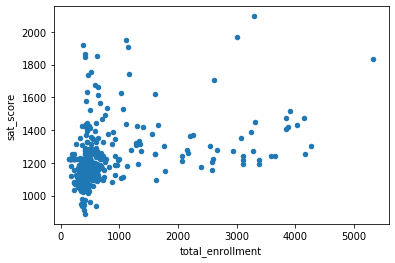

In [143]:
combined.plot(kind='scatter', x='total_enrollment', y='sat_score')